In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn import cross_validation,tree ,preprocessing,decomposition


In [109]:
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


In [60]:
#reading the data
df = pd.read_csv("Carseats.csv")

In [61]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#DataSet Description:
#### The Dataset consists of  data frame with 400 observations on the following 11 variables.

**Variable** | **__ Description__** |** Type**
---|---|---
Sales|Unit sales (in thousands) at each location|float
CompPrice|Price charged by competitor at each location|Integer
Income|Community income level (in thousands of dollars)|Integer
Advertising|Local advertising budget for company at each location (in thousands of dollars)|Integer
Population|Population size in region (in thousands)|Integer
Price|Price company charges for car seats at each site|Integer
ShelveLoc|A factor with levels indicating the quality of the shelving location|Qualitative
Age|Average age of the local population|Quantitative
Education|Education level at each location|Integer
Urban|A factor with levels No and Yes to indicate whether the store is in an urban or rural location|Qualitative
US|A factor with levels No and Yes to indicate whether the store is in the US or not|Qualitative


In [62]:
#Creating new feature to record if the Sale is higher than a threshold
# 0 indicates lower than threshold and 1 otherwise

df['High'] = 0
df.loc[(df.Sales > 8) , 'High'] = 1

In [63]:
df.High.value_counts()

0    236
1    164
Name: High, dtype: int64

### Goal - Predict whether the Sales is 'High' or not based on the precitor variables
### response variable = 'High'

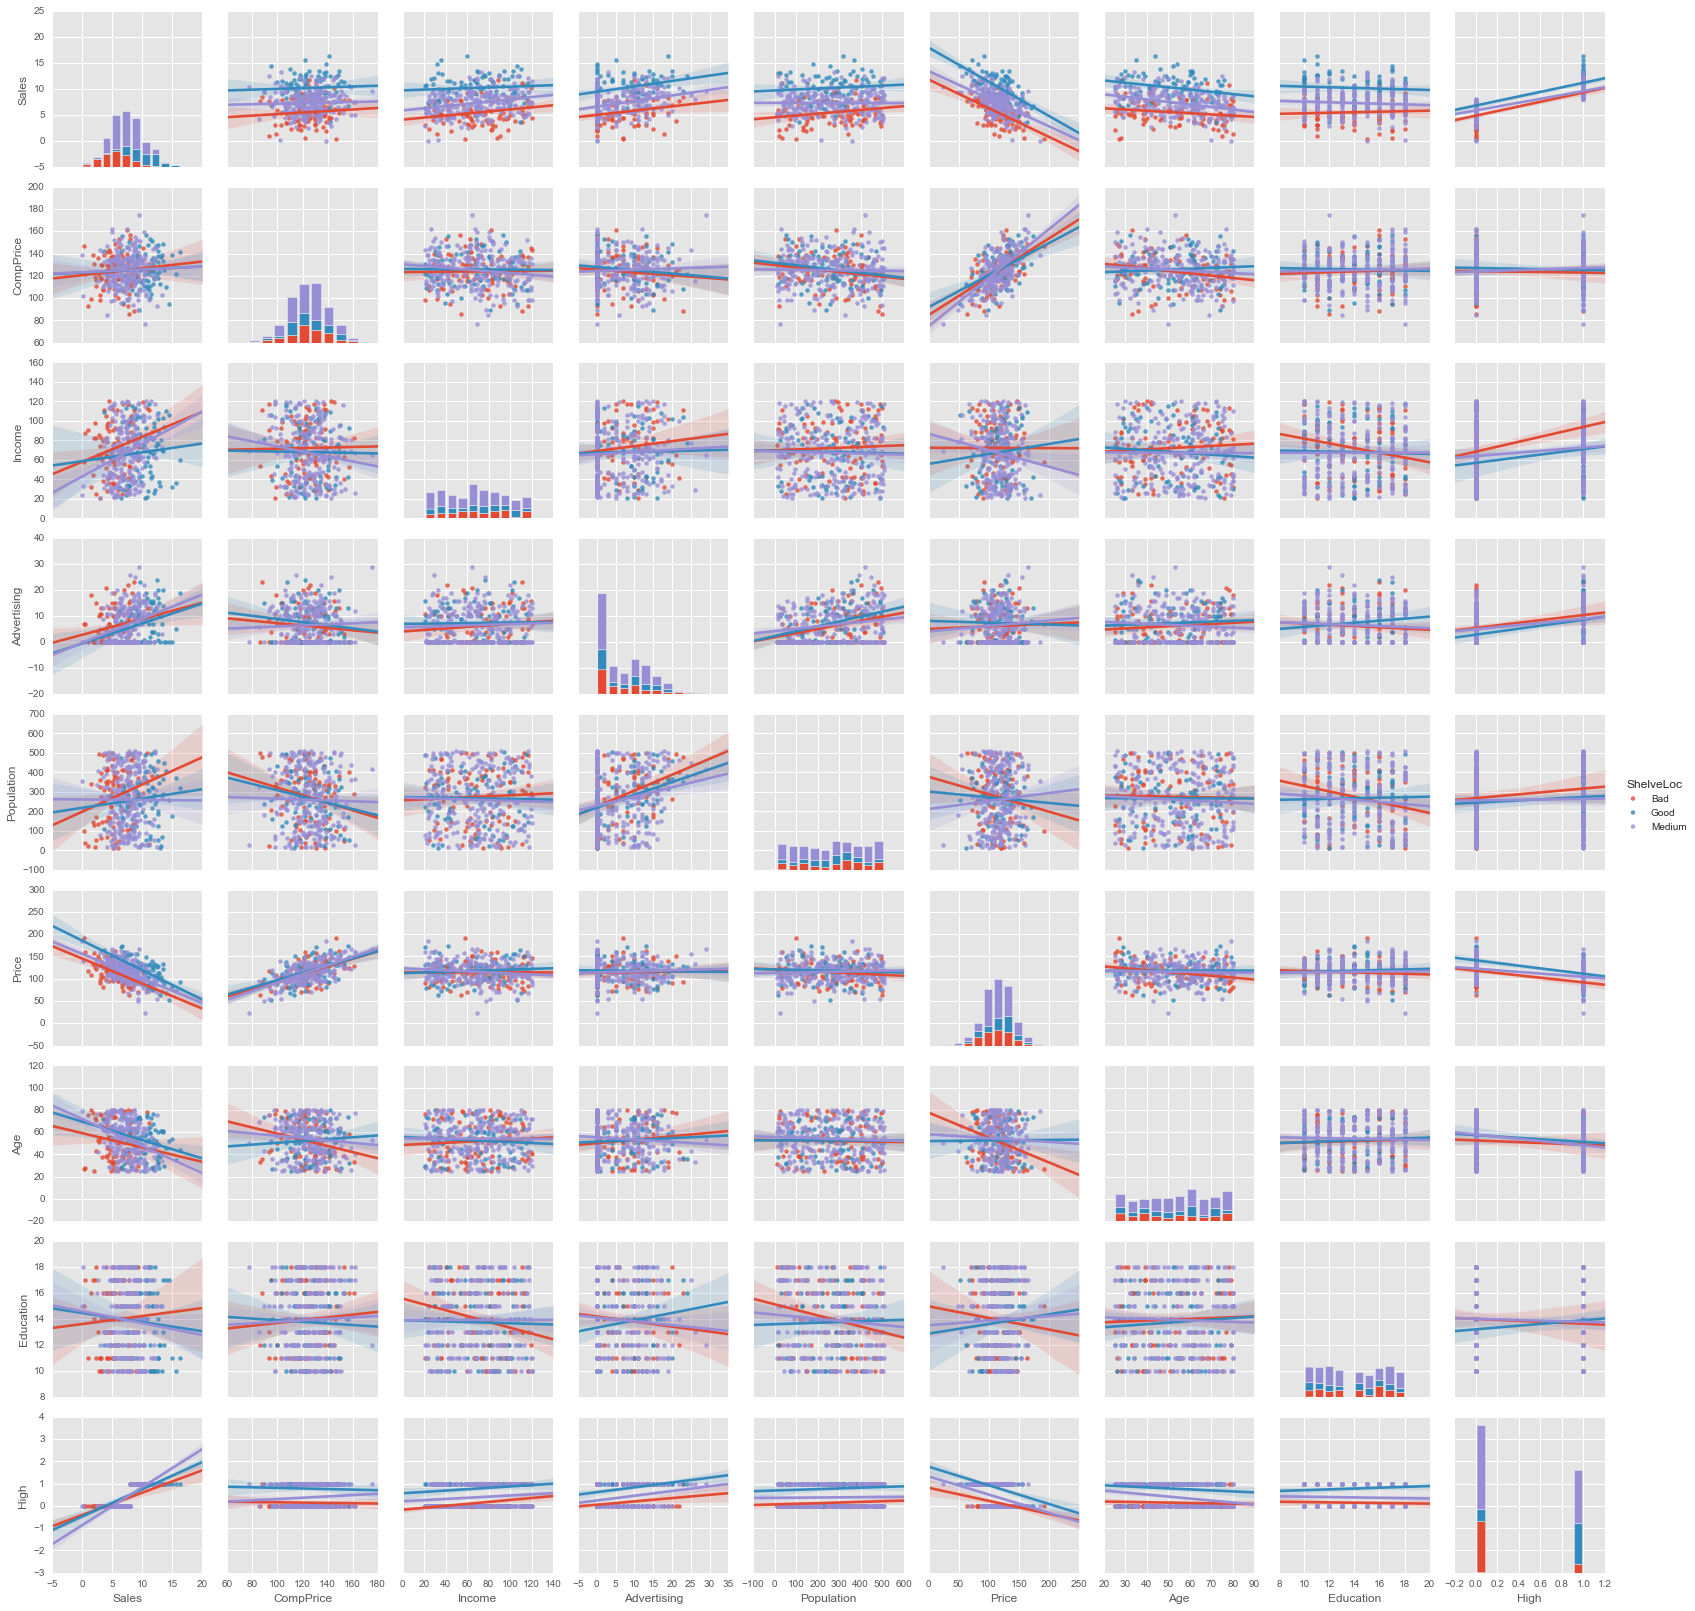

In [64]:
sns.pairplot(data = df , hue = "ShelveLoc",kind='reg')

Findings:
    - Sales seem to decline with Price
    - ShelveLoc and education does not impact sales as much

In [ ]:
X.head()

In [66]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [67]:
#Creation of dummy variable for categorical data
df_shelveLoc = pd.get_dummies(df.ShelveLoc,prefix ='shelf')
df_urban = pd.get_dummies(df.Urban,prefix ='Urban')
df_US = pd.get_dummies(df.US,prefix ='US')

df = pd.concat([df,df_shelveLoc,df_urban,df_US],axis=1)



In [68]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High,shelf_Bad,shelf_Good,shelf_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,shelf_Bad,shelf_Good,shelf_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,111,48,16,260,83,Good,65,10,Yes,Yes,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,113,35,10,269,80,Medium,59,12,Yes,Yes,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,141,64,3,340,128,Bad,38,13,Yes,No,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [77]:
# Creating predictor and response variables and dropping the cateogorical features foe which dummies have been created
X = df.drop(['Sales','High','Urban','US','ShelveLoc'],axis=1)
y = df.High


In [78]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,shelf_Bad,shelf_Good,shelf_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,111,48,16,260,83,65,10,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,113,35,10,269,80,59,12,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,117,100,4,466,97,55,14,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,141,64,3,340,128,38,13,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [79]:
#Running PCA for dimension reduction and feature selection

X_new = decomposition.PCA().fit_transform(X)

In [83]:
#Train - Test split
train_X,test_X,train_y,test_y = cross_validation.train_test_split(X_new,y,test_size=.2)

In [88]:
#Creating a decision Tree classifier
model_default = tree.DecisionTreeClassifier().fit(train_X,train_y)

In [99]:
# Checking the feature importance of the tree
model_default.feature_importances_

array([ 0.03041627,  0.15175244,  0.06397246,  0.11281398,  0.21058075,
        0.07576029,  0.0311772 ,  0.05714002,  0.        ,  0.01444391,
        0.25194269,  0.        ,  0.        ,  0.        ])

In [100]:
sorted(zip(model_default.feature_importances_, X.columns.values), reverse = True)

[(0.25194268513529383, 'Urban_No'),
 (0.21058075407309118, 'Price'),
 (0.15175243555955698, 'Income'),
 (0.11281398429656535, 'Population'),
 (0.075760285932669924, 'Age'),
 (0.063972458312768529, 'Advertising'),
 (0.057140016376094054, 'shelf_Bad'),
 (0.0311771958293172, 'Education'),
 (0.030416274999808934, 'CompPrice'),
 (0.014443909484833891, 'shelf_Medium'),
 (0.0, 'shelf_Good'),
 (0.0, 'Urban_Yes'),
 (0.0, 'US_Yes'),
 (0.0, 'US_No')]

#### Observations:
   - Appears that the Rural location of the store is the most significant factor followed by price in making a split

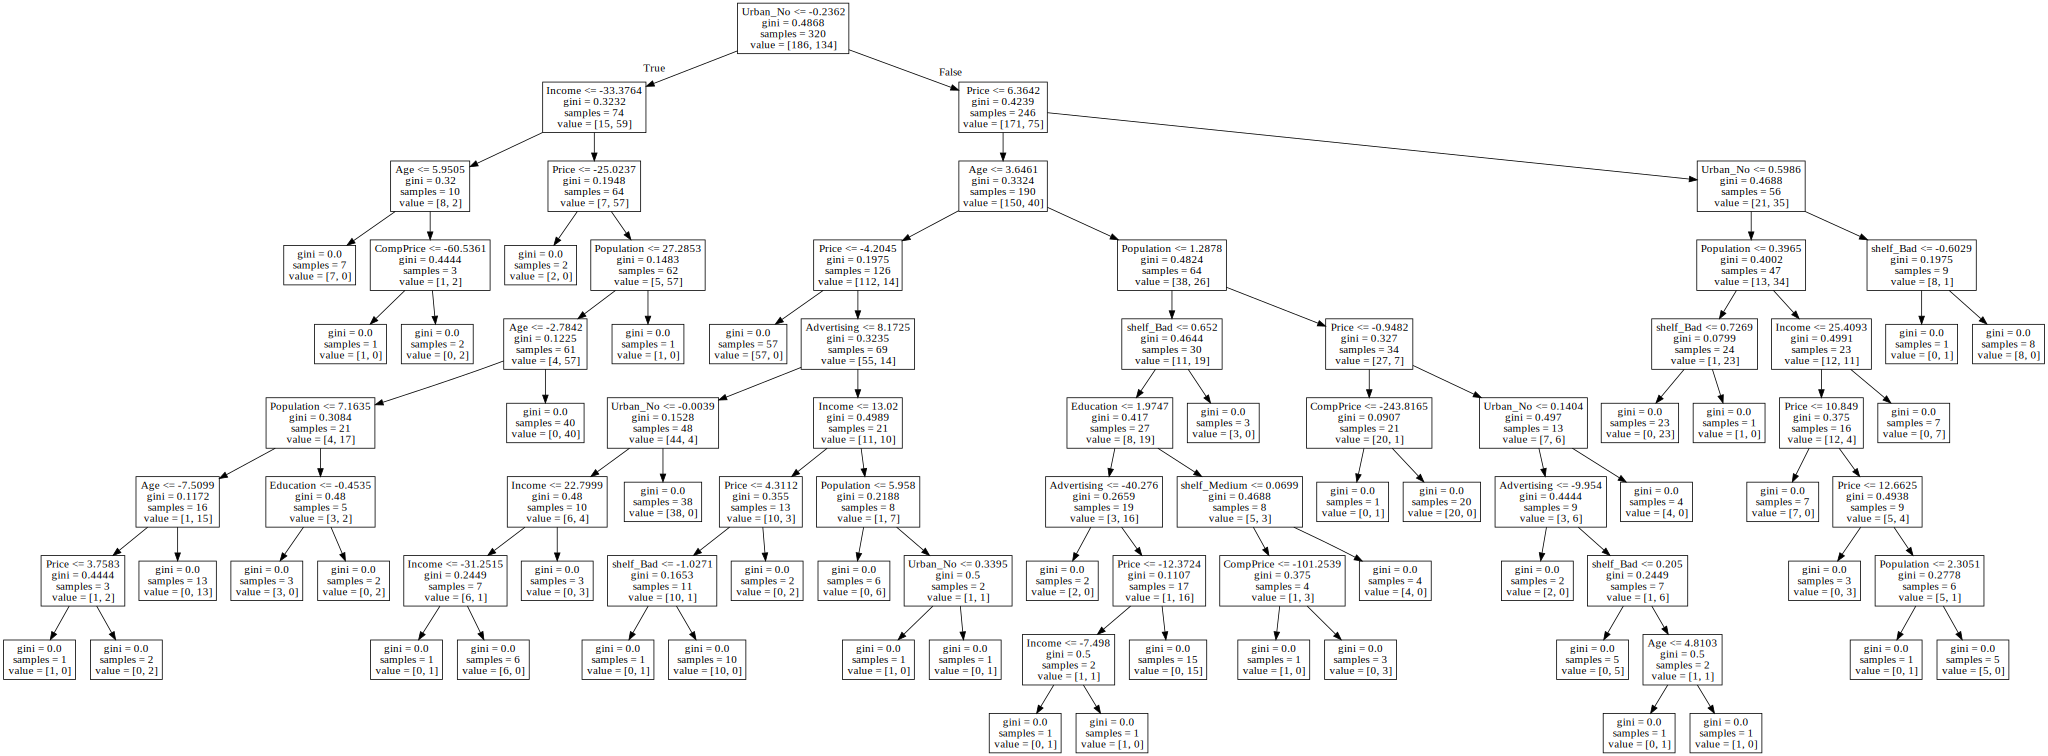

In [113]:
#dot -Tpdf Carseats.dot -o Carseats.pdf
import pydotplus 
from sklearn import externals
from sklearn.externals.six import StringIO  
%reload_ext gvmagic
dot_data = externals.six.StringIO()
tree.export_graphviz(model_default, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

In [94]:
y_hat_train = model_default.predict(X_new) 
model_default.score(train_X,train_y)

1.0

In [95]:
model_default.score(test_X,test_y)

0.71250000000000002

In [96]:
# Note: - The training accuracy is 100% but score on test data is 71%, which suggests overfitting.

### * Using CV to find an optimum tree and reduce overfitting:

In [128]:
split_ratio = np.arange(10,100,11)*.01

In [129]:
split_ratio
    

array([ 0.1 ,  0.21,  0.32,  0.43,  0.54,  0.65,  0.76,  0.87,  0.98])

In [143]:
np.arange(10,100,10)*.1

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [144]:
#creating a data frame to store the results:
df_eval = pd.DataFrame({'Train_score':np.nan,'cv_score':np.nan,'sample_split':np.nan,'depth':np.nan},index=[0])
split_ratio = np.arange(10,100,10)*.01 # will be used to specify the % of nodes in leaf node
depth = np.arange(10,100,10)*.1 # will be used as the max depth of the tree
for i in range(0,len(depth)):
#     best_split = []
    temp_train_score = []
    temp_cv_score = []
    for j in range(0,len(split_ratio)):
        model_temp = tree.DecisionTreeClassifier(max_depth = depth[i],min_samples_leaf=split_ratio[j])
        model_temp.fit(train_X,train_y)
        # Appending the values to a list
        temp_train_score.append(model_temp.score(train_X , train_y))
        # Getting the best CV scores
        temp_cv_score.append(cross_validation.cross_val_score(model_temp,train_X,train_y,cv=10).mean())
    
    
    # Getting the best % of samples reqd for a leaf node
    best_split_at_depth = split_ratio[temp_cv_score.index(max(temp_cv_score))]
    df_eval.loc[i ,'sample_split'] = best_split_at_depth
    df_eval.loc[i ,'Train_score'] = max(temp_train_score)
    df_eval.loc[i ,'cv_score'] = max(temp_cv_score)
    df_eval.loc[i ,'depth'] = depth[i]
    
    

        
        

In [149]:
df_eval

,Train_score,cv_score,depth,sample_split
0,0.718750,0.687256,1.0,0.1
1,0.781250,0.690481,2.0,0.1
2,0.812500,0.731730,3.0,0.1
3,0.850000,0.724875,4.0,0.1
4,0.884375,0.699768,5.0,0.6
5,0.925000,0.706516,6.0,0.3
6,0.975000,0.706030,7.0,0.1
7,0.993750,0.700171,8.0,0.9
8,1.000000,0.697034,9.0,0.2


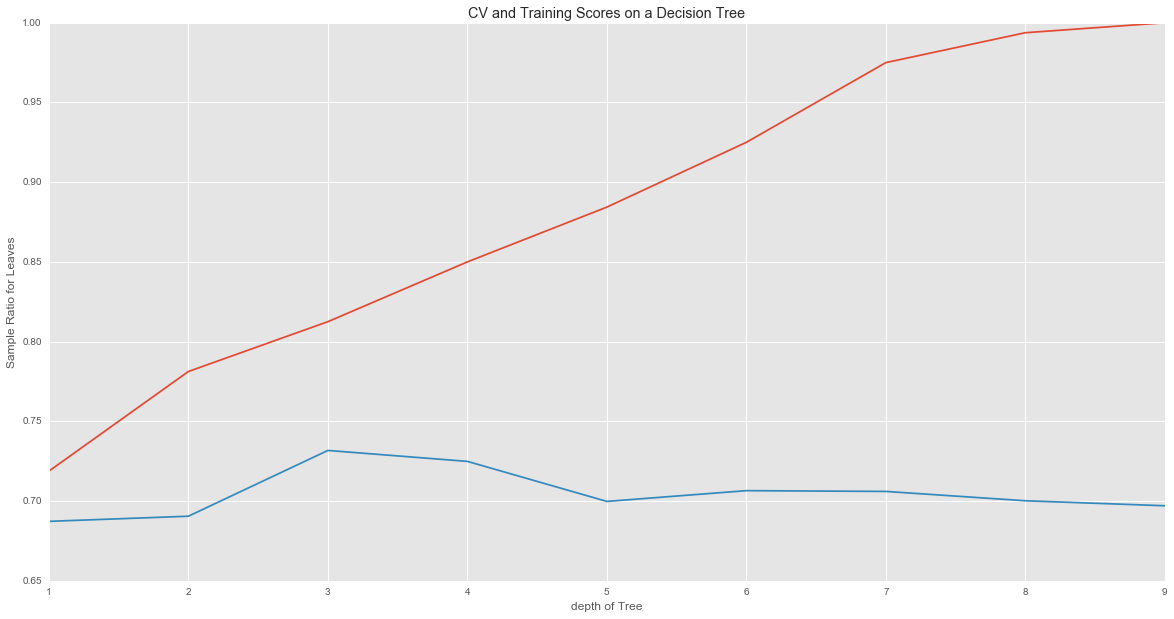

In [148]:
plt.figure(figsize=(20,10))
plt.plot(df_eval.depth , df_eval.Train_score, label = 'Training Score')
plt.plot(df_eval.depth , df_eval.cv_score, label = 'CV Score')
plt.xlabel('depth of Tree')
plt.ylabel('Score')
plt.title('CV and Training Scores on a Decision Tree')

### Findings :
- Cross Validation approach suggests that the best test score can be obtained by using a decision tree that has the following parameters:
    - Depth = 3 and 10% of the samples needed to for a Lef node

In [151]:
model_final = tree.DecisionTreeClassifier(max_depth = 3,min_samples_leaf=.1).fit(test_X,test_y)
model_final.score(test_X,test_y)

0.92500000000000004

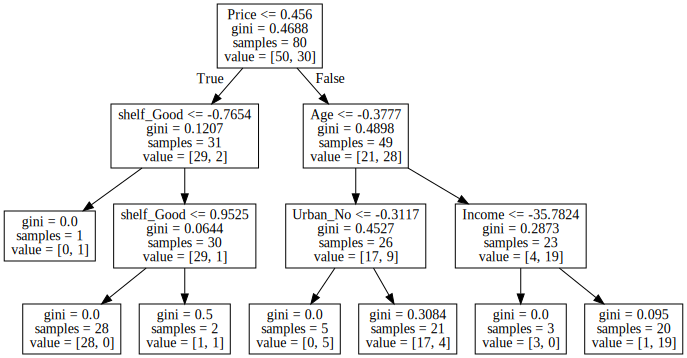

In [152]:
import pydotplus 
from sklearn import externals
from sklearn.externals.six import StringIO  
%reload_ext gvmagic
dot_data = externals.six.StringIO()
tree.export_graphviz(model_final, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

## Test Data Conclusion:
- Appears that in the Final model using classification decision tree Price and good shelve locations are the most important criterion